In [9]:
import pandas as pd
import numpy as np
import collections
import ast
import matplotlib.pyplot as plt


In [10]:
df = pd.read_csv("analysed cc - first pass.csv")
#contains the dictionary where keys are specific key words, and values are a tuple of (x_bar, n)
kwk = ['lecture',
 'material',
 'information',
 'organization',
 'disorganized',
 'concepts',
 'discussion',
 'memorization',
 'workload',
 'read',
 'exams',
 'presentation',
 'homework',
 'labs',
 'textbook',
 'curve',
 'recitation']
key_words = {i:[0,0,0,0,0] for i in kwk}

#df['tweet'].info()

(array([1060.,    0.,  830.,    0.,    0., 1206.,    0., 3773.,    0.,
        9826.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

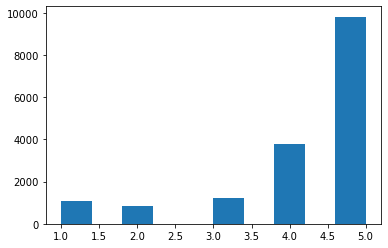

In [11]:
plt.hist(df["classified"].values)

In [12]:
# function that goes in lambda expression below
def update_weight_running_average(input): # input is a tuple where input[0] is list of words and input[1] is rating
    for x in ast.literal_eval(input[0]):
        #print(x)
        if x in key_words: # key_words dictionary
            key_words[x][0] = (key_words[x][0] * key_words[x][1] + int(input[1])) / (key_words[x][1] + 1)
            key_words[x][1] += 1

In [13]:
def update_weight(input): # input is a tuple where input[0] is list of words and input[1] is rating
    for x in ast.literal_eval(input[0]):
        #print(x)
        if x in key_words: # key_words dictionary
            key_words[x][int(input[1]) - 1] += 1

In [14]:
for index, row in df[["tweet", "classified"]].iterrows():
    update_weight((row['tweet'], row['classified']))

In [15]:
print(key_words)

{'lecture': [481, 418, 485, 1044, 2067], 'material': [456, 552, 582, 1328, 2877], 'information': [84, 90, 95, 222, 542], 'organization': [36, 39, 24, 93, 140], 'disorganized': [0, 0, 0, 0, 0], 'concepts': [108, 156, 140, 385, 681], 'discussion': [46, 55, 76, 181, 368], 'memorization': [35, 41, 41, 92, 265], 'workload': [35, 41, 41, 157, 293], 'read': [201, 234, 241, 630, 1382], 'exams': [247, 344, 328, 687, 985], 'presentation': [15, 10, 13, 23, 57], 'homework': [269, 267, 326, 840, 1207], 'labs': [80, 106, 76, 197, 247], 'textbook': [109, 113, 108, 240, 410], 'curve': [93, 78, 85, 128, 134], 'recitation': [6, 3, 1, 10, 15]}


In [21]:
for x in list(key_words):
    # key_words[x][0] -= 3
    if key_words[x] == [0,0,0,0,0]:
        del key_words[x]

In [22]:
print(key_words)

{'lecture': [481, 418, 485, 1044, 2067], 'material': [456, 552, 582, 1328, 2877], 'information': [84, 90, 95, 222, 542], 'organization': [36, 39, 24, 93, 140], 'concepts': [108, 156, 140, 385, 681], 'discussion': [46, 55, 76, 181, 368], 'memorization': [35, 41, 41, 92, 265], 'workload': [35, 41, 41, 157, 293], 'read': [201, 234, 241, 630, 1382], 'exams': [247, 344, 328, 687, 985], 'presentation': [15, 10, 13, 23, 57], 'homework': [269, 267, 326, 840, 1207], 'labs': [80, 106, 76, 197, 247], 'textbook': [109, 113, 108, 240, 410], 'curve': [93, 78, 85, 128, 134], 'recitation': [6, 3, 1, 10, 15]}


In [25]:
total_review_numbers = [0,0,0,0,0]
for key, value in key_words.items():
    total_review_numbers = [i + j for i, j in zip(total_review_numbers, value)]
    

print(total_review_numbers)

[2301, 2547, 2662, 6257, 11670]


(array([6., 3., 2., 0., 1., 2., 0., 0., 0., 2.]),
 array([  6. ,  53.5, 101. , 148.5, 196. , 243.5, 291. , 338.5, 386. ,
        433.5, 481. ]),
 <a list of 10 Patch objects>)

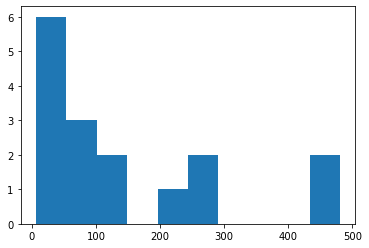

In [24]:
plt.hist([k[0] for k in key_words.values()])

In [28]:
word_Usage = {}
for x, y in key_words.items():
    word_Usage[x] = [0,0,0,0,0]
    for i in range(len(y)):
        word_Usage[x][i] = y[i] * 1.0 / total_review_numbers[i]
    word_Usage[x] = max(word_Usage[x])
print(word_Usage)

{'lecture': 0.20903954802259886, 'material': 0.24652956298200515, 'information': 0.04644387317909169, 'organization': 0.01564537157757497, 'concepts': 0.06153108518459326, 'discussion': 0.031533847472150815, 'memorization': 0.022707797772065125, 'workload': 0.025107112253641817, 'read': 0.11842330762639246, 'exams': 0.13506085590891245, 'presentation': 0.00651890482398957, 'homework': 0.13424964040274892, 'labs': 0.04161758932076953, 'textbook': 0.04737070838765754, 'curve': 0.04041720990873533, 'recitation': 0.002607561929595828}


In [29]:
mx = max(word_Usage.values())
mn = min(word_Usage.values())

for key, value in word_Usage.items():
    word_Usage[key] = (value - mn) * 1.0 / (mx - mn)

print(word_Usage)

{'lecture': 0.8463032658076991, 'material': 1.0, 'information': 0.17971446224761475, 'organization': 0.053450732577328366, 'concepts': 0.2415670706240929, 'discussion': 0.11858825943437491, 'memorization': 0.08240435776906627, 'workload': 0.09224075822177152, 'read': 0.4748064758287726, 'exams': 0.5430149531729103, 'presentation': 0.016035219773198512, 'homework': 0.5396892363344803, 'labs': 0.15992828536525483, 'textbook': 0.18351418184882742, 'curve': 0.15500712447425227, 'recitation': 0.0}
